* Im więcej danych treningowych, tym sieci neuronowe powinny być lepiej wytrenowane, lepiej przewidywać na nowych danych.
* Głębokie sieci konwolucyjne (CNN) potrafią stopniowo filtrować różne części danych uczących i wyostrzać ważne cechy w procesie dyskryminacji
wykorzystanym do rozpoznawania lub klasyfikacji wzorców.

* **Jak przechowywane są kolorowe zdjęcia?** Tensor - zestaw 3 macierzy, każda odpowiada za inną barwę: RGB. W sieciach neuronowych operacje przeprowadzane są na tensorach. To uogólnienie macierzy. Tensor 0-wymiarowy to skalar, 1-wymiarowy to wektor, 2-wymiarowy to macierz, reszta to tensor 3-,4-wymiarowy itd.

* 5-wymiarowe tensory przechowują informacje o video: próbki, klatki, wysokość, szerokość, liczba kanałów (głębokość).

* Biblioteki uczenia głębokiego:

 **Keras** - interfejs wysokiego poziomu, działa na TensorFlow, szybkie prototypowanie sieci neuronowych, obsługuje sieci konwolucyjne, rekurencyjne i ich kombinacje, działa na CPU i GPU

 **TensorFlow** - do obliczeń numerycznych wykorzystywana w uczeniu maszynowym i głębokich sieciach neuronowych, zawiera w sobie bibliotekę Keras zoptymalizowaną pod kątem działania. 


**Sieci gęste nie są efektywne w zapamiętywaniu wzorców z obrazu, sieci konwolucyjne są najlepsze do analizowania obrazów.**

## Implementacja sieci neuronowej gęstej z użyciem biblioteki Keras

* sieć neuronowa gęsta - wszystkie neurony połączone ze sobą, **Perceptron Wielowarstwowy (Multilayer Perceptron)**


In [ ]:
import keras
from keras.datasets import mnist 
# mnist to zbiór odręcznie zapisanych cyfr, 28x28 px
from keras.models import Sequential 
# pozwoli budować modele sekwencyjnie (warstwy układane na stosie)
from keras.layers import Dense 
# warstwa gęsta
from keras.optimizers import RMSprop

In [ ]:
# podział na dane testowe i treningowe już przy załadowaniu!!!!
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
# EDA
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print('Liczba danych treningowych:',X_train.shape[0])
print('Liczba danych testowych:',X_test.shape[0])
print('Rozmiar pojedynczego obrazka:',X_train[0].shape)

Liczba danych treningowych: 60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka: (28, 28)


(-0.5, 27.5, 27.5, -0.5)

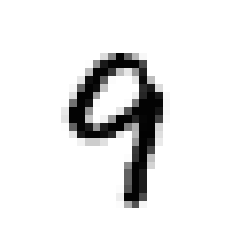

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[550], cmap='Greys')
plt.axis('off') # bez osi OX,OY

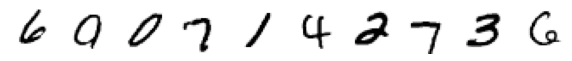

In [ ]:
# wyświetlanie kilku obiektów na raz:

plt.figure(figsize=(10,10))
for i in range (1,11):
    plt.subplot(1,10,i) # wiersze, kolumny, nr iteracji
    plt.axis('off')
    plt.imshow(X_train[i+900], cmap='Greys')
plt.show()

In [ ]:
# jak wyglądają etykiety??
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# przygotowanie danych

# trzeba ujednolicić rozmiary danych
X_train = X_train.reshape(60000,28*28)
# l.próbek, piksele

In [ ]:
X_test = X_test.reshape(10000,28*28)

In [ ]:
X_test.dtype 

dtype('uint8')

In [ ]:
# chcemy, by dane wejściowe były w formie zmiennoprzecinkowej (typu float)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# liczby całkowite od 0 do 255 - chcemy je przeskalować
# całą macierz dzielimy przez max. wartość, czyli 255
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# mamy 10 klas do rozpoznawania
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
# Budowa modelu

model = Sequential()
# Dense, bo sieć gęsta
model.add(Dense(units=512, # wybieramy nie 28x28, tylko mniej neuronów, 2^x
                activation='relu', # wprowadza nieliniowość do sieci, typowa dla obrazów
                input_shape=(28*28,))) # rozmiar obrazka (danych)
model.add(Dense(units=512,
                activation='relu'))
model.add(Dense(units=10, # = mamy 10 liczb do rozpoznania(klas)
                activation='softmax')) # zwraca prawd. przynależn.do klas,
                # idealna do problemów nieliniowych


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# każdy zbudowany model należy skompilować!!!
# każdy model musi zawierać optymalizator i funkcję straty
model.compile(optimizer=RMSprop(),
              loss='categorical_crossentropy', # problem kategoryzacji, nie binarny
              metrics=['accuracy']) # pomaga spr. jak nasz model performuje

In [ ]:
# trenowanie modelu

# model przypiszemy do zmiennej, żeby mieć dostęp do danych, które zwróci
history = model.fit(X_train,
                    y_train,
                    batch_size=128, # po 128 próbkach następuje przeliczenie gradientu i aktualizacja wag
                    epochs=20, # nasze dane tyle razy przechodzą przez sieć, ilosć iteracji przez cały zbiór x i y
                    validation_data=(X_test,y_test))

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.2212 - accuracy: 0.9319 - val_loss: 0.1162 - val_accuracy: 0.9628
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0803 - accuracy: 0.9749 - val_loss: 0.1024 - val_accuracy: 0.9705
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0526 - accuracy: 0.9838 - val_loss: 0.0806 - val_accuracy: 0.9771
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.0740 - val_accuracy: 0.9817
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0832 - val_accuracy: 0.9780
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0871 - val_accuracy: 0.9790
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0916 - val_accuracy: 0.9795

In [ ]:
# otrzymujemy nr i czas trwania epochu
# czas pojedynczego kroku (per step)
# loss = strata, CCE
# accuracy
# val_loss = wskaźnik straty na zbiorze testowym
# VAL_ACCURACY = accuracy na zbiorze testowym, TO JEST WARTOŚĆ NASZEGO MODELU,
# minimalnie mniejsza dokładność na danych testowych niż treningowych (logiczne)


In [ ]:
# GDYBYŚMY TRENOWALI MODEL BEZ SPRAWDZANIA GO NA DANYCH TESTOWYCH:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1868 - accuracy: 0.9810


[0.18676985800266266, 0.9810000061988831]

In [ ]:
history.history 
# otrzymamy wartości wyliczone podczas trenowania dla każdej epoki 
# accuracy, straty, accuracy i straty na zbiorze testowym

{'accuracy': [0.9319333434104919,
  0.9749166369438171,
  0.9837666749954224,
  0.9878333210945129,
  0.9904500246047974,
  0.9922833442687988,
  0.9947333335876465,
  0.9953833222389221,
  0.9960833191871643,
  0.996666669845581,
  0.9969000220298767,
  0.9971166849136353,
  0.9973499774932861,
  0.9981666803359985,
  0.9979333281517029,
  0.9978333115577698,
  0.9981833100318909,
  0.9984166622161865,
  0.9984333515167236,
  0.9986833333969116],
 'loss': [0.2212231159210205,
  0.08026944100856781,
  0.052578069269657135,
  0.03907949477434158,
  0.030085880309343338,
  0.023804020136594772,
  0.017513887956738472,
  0.014890791848301888,
  0.013094710186123848,
  0.011308026500046253,
  0.009851236827671528,
  0.01022645365446806,
  0.008255007676780224,
  0.0063878814689815044,
  0.00655863294377923,
  0.007918938994407654,
  0.006488271523267031,
  0.0052503966726362705,
  0.005684055387973785,
  0.004832256585359573],
 'val_accuracy': [0.9628000259399414,
  0.9704999923706055,
  0

In [ ]:
def plot_accuracy(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu 
    na zbiorze treningowym i walidacyjnym
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style='whitegrid')
    
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs=range(1,len(acc)+1)

    plt.figure(figsize=(10,8))
    plt.plot(epochs,acc,label='Dokładność trenowania',marker='o')
    plt.plot(epochs,val_acc,label='Dokładność walidacji',marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def plot_loss(history):
    """
    Funkcja zwraca wykres straty (loss) modelu
    na zbiorze treningowym i walidacyjnym
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style='whitegrid')

    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1,len(loss)+1)

    plt.figure(figsize=(10,8))
    plt.plot(epochs,loss,label='Strata trenowania',marker='o')
    plt.plot(epochs,val_loss,label='Strata walidacji',marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()


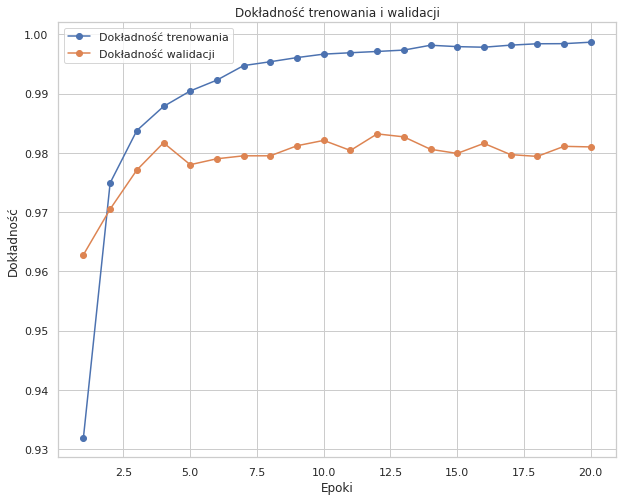

In [ ]:
plot_accuracy(history)

In [ ]:
# model na danych treningowych performuje znakomicie
# można modyfikować model, by poprawić wyniki na danych testowych
# ilość warstw ukrytych, funkcja aktywacji - może być lepiej

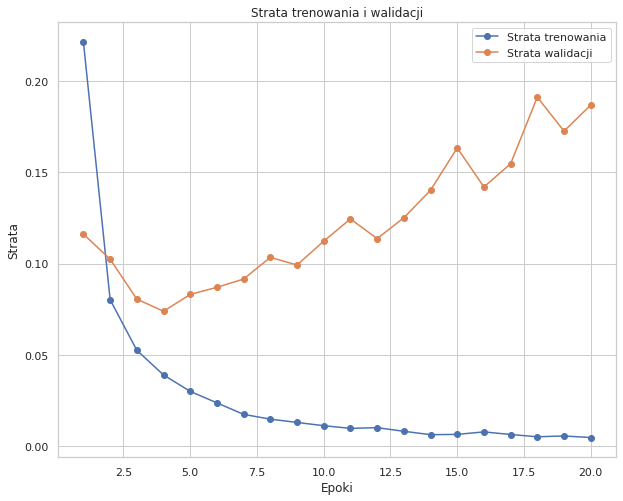

In [ ]:
plot_loss(history)

In [ ]:
# gdy model zaczyna performować gorzej na stracie,
# powinniśmy przerwać uczenie (około 5-6. epoka),
# bo model zaczyna nadmiernie dopasowywać się do danych treningowych (overfitting)